In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import warnings

warnings.filterwarnings('ignore')

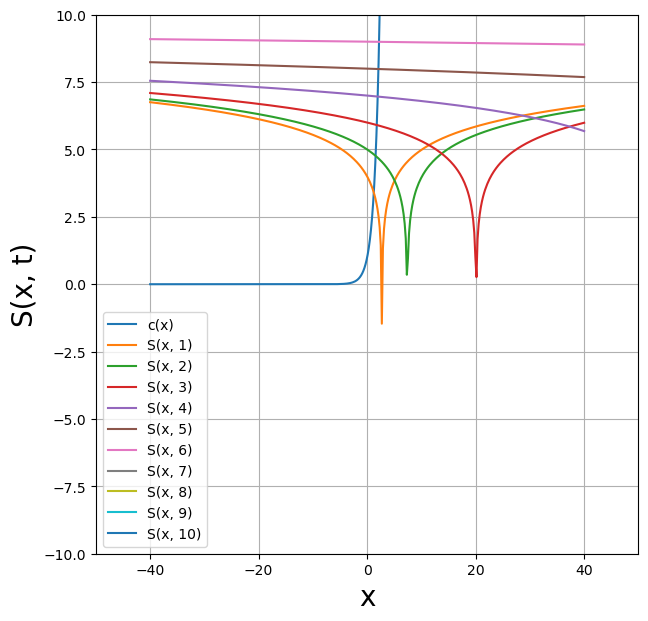

In [2]:
def S(x, t):
    x0 = -3
    return np.log(np.abs(np.e**x - t)) - x0

def c(x):
    return (2 * np.sqrt(1 + 8 * np.exp(x))) / (1 + np.sqrt(1 + 8 * np.exp(x)))

t_arr = np.linspace(1, 10, 10)
x_arr = np.linspace(-40, 40, 400)

to_plot = []

for i in t_arr:
    tmp_arr = []
    for j in x_arr:
        tmp_arr.append(S(i, j))
    to_plot.append(tmp_arr)

fig = plt.figure(figsize=(7, 7))
plt.grid()

plt.plot(x_arr, np.exp(x_arr), label="c(x)")

for i in range(t_arr.size):
    plt.plot(x_arr, np.array(to_plot[i]), label="S(x, " + str(i + 1) + ")")

plt.xlim([-50, 50])
plt.ylim([-10, 10])

plt.ylabel("S(x, t)", fontsize = 20)
plt.xlabel("x", fontsize = 20)

plt.legend()
plt.show()

[[ 1.        ]
 [ 1.69282828]
 [ 2.41770168]
 [ 3.16823922]
 [ 3.93829969]
 [ 4.72263642]
 [ 5.51711303]
 [ 6.3186434 ]
 [ 7.12500983]
 [ 7.93465884]
 [ 8.74652088]
 [ 9.55986802]
 [10.37420867]
 [11.18921264]
 [12.00465886]
 [12.82039967]
 [13.63633658]
 [14.45240398]
 [15.26855815]
 [16.08477008]
 [16.9010204 ]
 [17.71729626]
 [18.5335891 ]
 [19.34989323]
 [20.16620487]
 [20.98252149]
 [21.79884141]
 [22.61516355]
 [23.43148715]
 [24.24781174]
 [25.06413698]
 [25.88046265]
 [26.69678861]
 [27.51311476]
 [28.32944103]
 [29.1457674 ]
 [29.96209382]
 [30.77842027]
 [31.59474673]
 [32.41107322]
 [33.22739972]
 [34.04372623]
 [34.86005274]
 [35.67637926]
 [36.49270579]
 [37.30903231]
 [38.12535884]
 [38.94168537]
 [39.7580119 ]
 [40.57433843]]


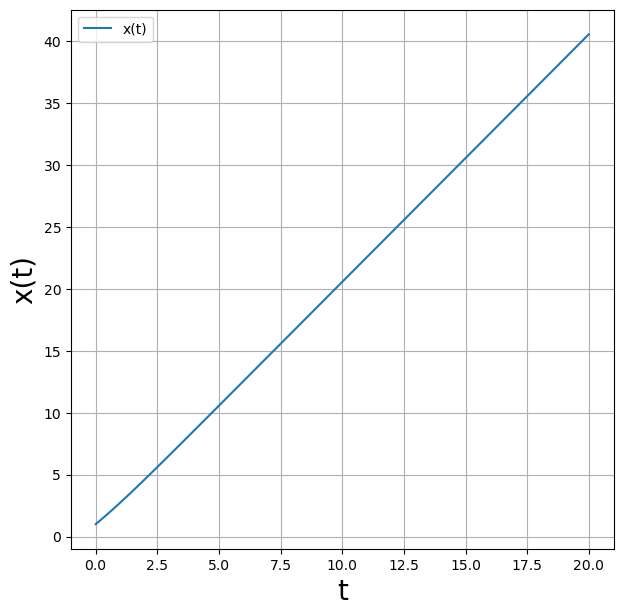

In [4]:
def ode_model(x, t):
    dxdt = (2 * np.sqrt(1 + 8 * np.exp(x))) / (1 + np.sqrt(1 + 8 * np.exp(x)))
    return dxdt

def c(x):
    return (2 * np.sqrt(1 + 8 * np.exp(x))) / (1 + np.sqrt(1 + 8 * np.exp(x)))

alpha = 1
x0 = alpha

t = np.linspace(0, 20)
x_slv = odeint(ode_model, x0, t)

print(x_slv)

fig = plt.figure(figsize=(7, 7))
plt.grid()

plt.plot(t, x_slv, label = "x(t)")
#plt.plot(x_slv, c(x_slv), label = "c(x)")

#plt.xlim([-1, 1])
#plt.ylim([-10, 10])

plt.ylabel("x(t)", fontsize = 20)
plt.xlabel("t", fontsize = 20)

plt.legend()
plt.show()

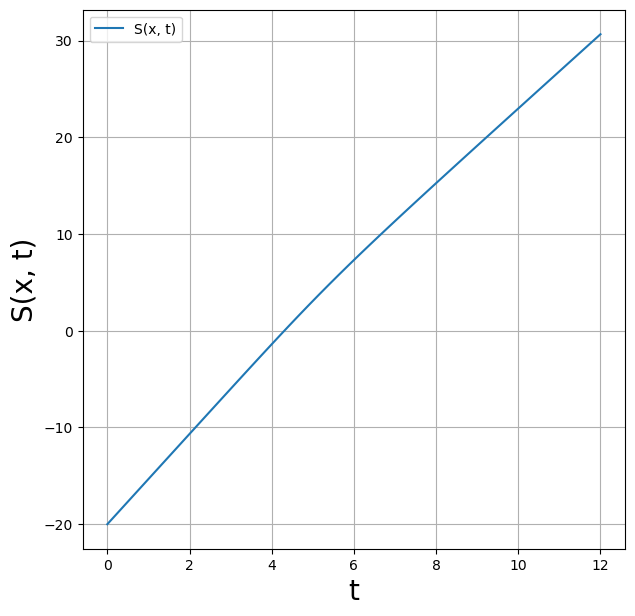

In [57]:
def S(x, t, alpha, flag):
    if flag == 0:
        return np.log(np.exp(2 * t - alpha) * (4 * np.exp(x) + (np.exp(t) - 1) * (np.sqrt(1 + 8 * np.exp(x)) - 1)) / 4)
    if flag == 1:
        return np.log(np.exp(-2 * t - alpha) * (4 * np.exp(x) + (np.exp(-t) - 1) * (np.sqrt(1 + 8 * np.exp(x)) - 1)) / 4)
    return "No flag"

t = np.linspace(0, 12)
x = np.linspace(-10, 10)

fig = plt.figure(figsize=(7, 7))
plt.grid()

plt.plot(t, S(x, t, 10, 0), label = "S(x, t)")

#plt.xlim([-1, 1])
#plt.ylim([-10, 10])

plt.ylabel("S(x, t)", fontsize = 20)
plt.xlabel("t", fontsize = 20)

plt.legend()
plt.show()

In [155]:
def X(t, a, alpha, flag):
    eta = np.sqrt(1 + 8 * np.exp(a + alpha))
    if flag == 0:
        return np.log(np.exp(t) * (eta - 1) * (2 + np.exp(t) * (eta - 1)) / 8)
    if flag == 1:
        return np.log(np.exp(-t) * (eta - 1) * (2 + np.exp(-t) * (eta - 1)) / 8)
    return "No flag"

def P(t, a, alpha, flag):
    eta = np.sqrt(1 + 8 * np.exp(a + alpha))
    if flag == 0:
        return (eta * (2 + np.exp(t) * (eta - 1))) / ((eta + 1) * (1 + np.exp(t) * (eta - 1)))
    if flag == 1:
        return (eta * (2 + np.exp(-t) * (eta - 1))) / ((eta + 1) * (1 + np.exp(-t) * (eta - 1)))
    return "No flag"

t = np.linspace(0, 12, 7)
tR = np.linspace(0, 12, 10000)
alpha = np.linspace(0, 8, 5)
alphaR = np.linspace(-200, 200, 1000)
a = -5

X_clctd_alpha = []
P_clctd_alpha = []

for i in t:
    tmp_arr_X = []
    tmp_arr_P = []
    for j in alphaR:
        tmp_arr_X.append(X(i, a, j, 0))
        tmp_arr_P.append(P(i, a, j, 0))
    X_clctd_alpha.append(tmp_arr_X)
    P_clctd_alpha.append(tmp_arr_P)

for i in t:
    tmp_arr_X = []
    tmp_arr_P = []
    for j in alphaR:
        tmp_arr_X.append(X(i, a, j, 1))
        tmp_arr_P.append(P(i, a, j, 1))
    X_clctd_alpha.append(tmp_arr_X)
    P_clctd_alpha.append(tmp_arr_P)
    
X_clctd_t = []
P_clctd_t = []

for i in alpha:
    tmp_arr_X = []
    tmp_arr_P = []
    for j in tR:
        tmp_arr_X.append(X(j, a, i, 0))
        tmp_arr_P.append(P(j, a, i, 0))
    X_clctd_t.append(tmp_arr_X)
    P_clctd_t.append(tmp_arr_P)
    
for i in alpha:
    tmp_arr_X = []
    tmp_arr_P = []
    for j in tR:
        tmp_arr_X.append(X(j, a, i, 1))
        tmp_arr_P.append(P(j, a, i, 1))
    X_clctd_t.append(tmp_arr_X)
    P_clctd_t.append(tmp_arr_P)

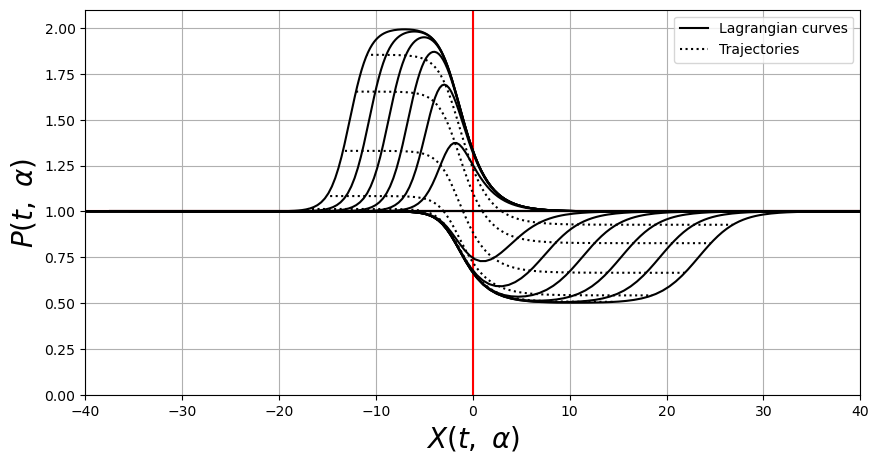

In [156]:
fig = plt.figure(figsize=(10, 5))
plt.grid()

plt.plot(np.linspace(-80, 80, 161), np.array([i/i for i in range(1, 162)]), color = "red")
plt.plot(np.array([0 for i in range(1, 51)]), np.linspace(-30, 30), color = "red")

#Для альфа из R и фиксированных значений t
for i in range(len(X_clctd_alpha)):
    if i == 0:
        plt.plot(np.array(X_clctd_alpha[i]), np.array(P_clctd_alpha[i]), color = "black", label="Lagrangian curves")
    else:
        plt.plot(np.array(X_clctd_alpha[i]), np.array(P_clctd_alpha[i]), color = "black")

#Для t из R и фиксированных альфа
for i in range(len(X_clctd_t)):
    if i == 0:
        plt.plot(np.array(X_clctd_t[i]), np.array(P_clctd_t[i]), linestyle="dotted", color = "black", label="Trajectories")
    else:
        plt.plot(np.array(X_clctd_t[i]), np.array(P_clctd_t[i]), linestyle="dotted", color = "black")

plt.xlim([-40, 40])
plt.ylim([0, 2.1])

plt.ylabel(r'$P(t,$' + " " + r'$\alpha$' + r'$)$', fontsize = 20)
plt.xlabel(r'$X(t,$' + " " + r'$\alpha$' + r'$)$', fontsize = 20)

plt.legend()
plt.show()